In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

# from sklearn.datasets import load_boston
# from sklearn.datasets import load_iris, load_breast_cancer
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression, LinearRegression
# from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# 

# from sklearn.ensemble import RandomForestClassifier


# import warnings
# warnings.filterwarnings('ignore')
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV



In [2]:
def heat_map(num_df):
    corr = num_df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(9, 7))
        ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [3]:
def random_forest_classifier_df(this_X_train, this_y_train, this_min_dpth:[int]=2, this_max_dpth:[int]=5, 
                                this_min_cv:[int]=5, this_max_cv:[int]=25, this_random_state=42):
    result_df = pd.DataFrame()
    for md in range(this_min_dpth, this_max_dpth+1):
        print(f"Depth: {md} -> ", end="")
        for cv_s in range(this_min_cv,this_max_cv+1,5):
            print(f"{cv_s}, ", end="")
            clf = RandomForestClassifier(max_depth=md, random_state=this_random_state)
            cross_val_scores = cross_val_score(clf, X_train, y_train, cv=cv_s)
            result_df = pd.concat([pd.DataFrame([[md, cv_s, np.mean(cross_val_scores)]]), result_df], axis=0)
        print(" ... done.")
    result_df.rename(columns={0: 'max_depth', 1: 'cv', 2:"mean_score"}, inplace=True)
    return result_df

In [4]:
data_ = pd.read_csv("./data/cleaned_data.csv")

In [5]:
data_.columns
# data_.head()


Index(['ujahr', 'umonat', 'weekday', 'uwochentag', 'long', 'lat',
       'time_of_day', 'ustunde', 'light_condition', 'ulichtverh',
       'street_condition', 'ustrzustand', 'uart', 'utyp1', 'ist_rad',
       'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige',
       'ukategorie', 'accident_outcome'],
      dtype='object')

In [6]:
data_["death"] = list(map(lambda x: 1 if x == "killed" else 0, data_.accident_outcome))

In [7]:
X = data_.drop(columns=["death", "accident_outcome", "ukategorie", "weekday", "time_of_day", "light_condition", "street_condition"], axis = 1)
y = data_["death"]

y.value_counts()
y


0        0
1        0
2        0
3        0
4        0
        ..
38846    0
38847    0
38848    0
38849    0
38850    0
Name: death, Length: 38851, dtype: int64

In [8]:
# upsampling

In [9]:
smote = SMOTE()

In [10]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    38731
1    38731
Name: death, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=42)

Tree plot


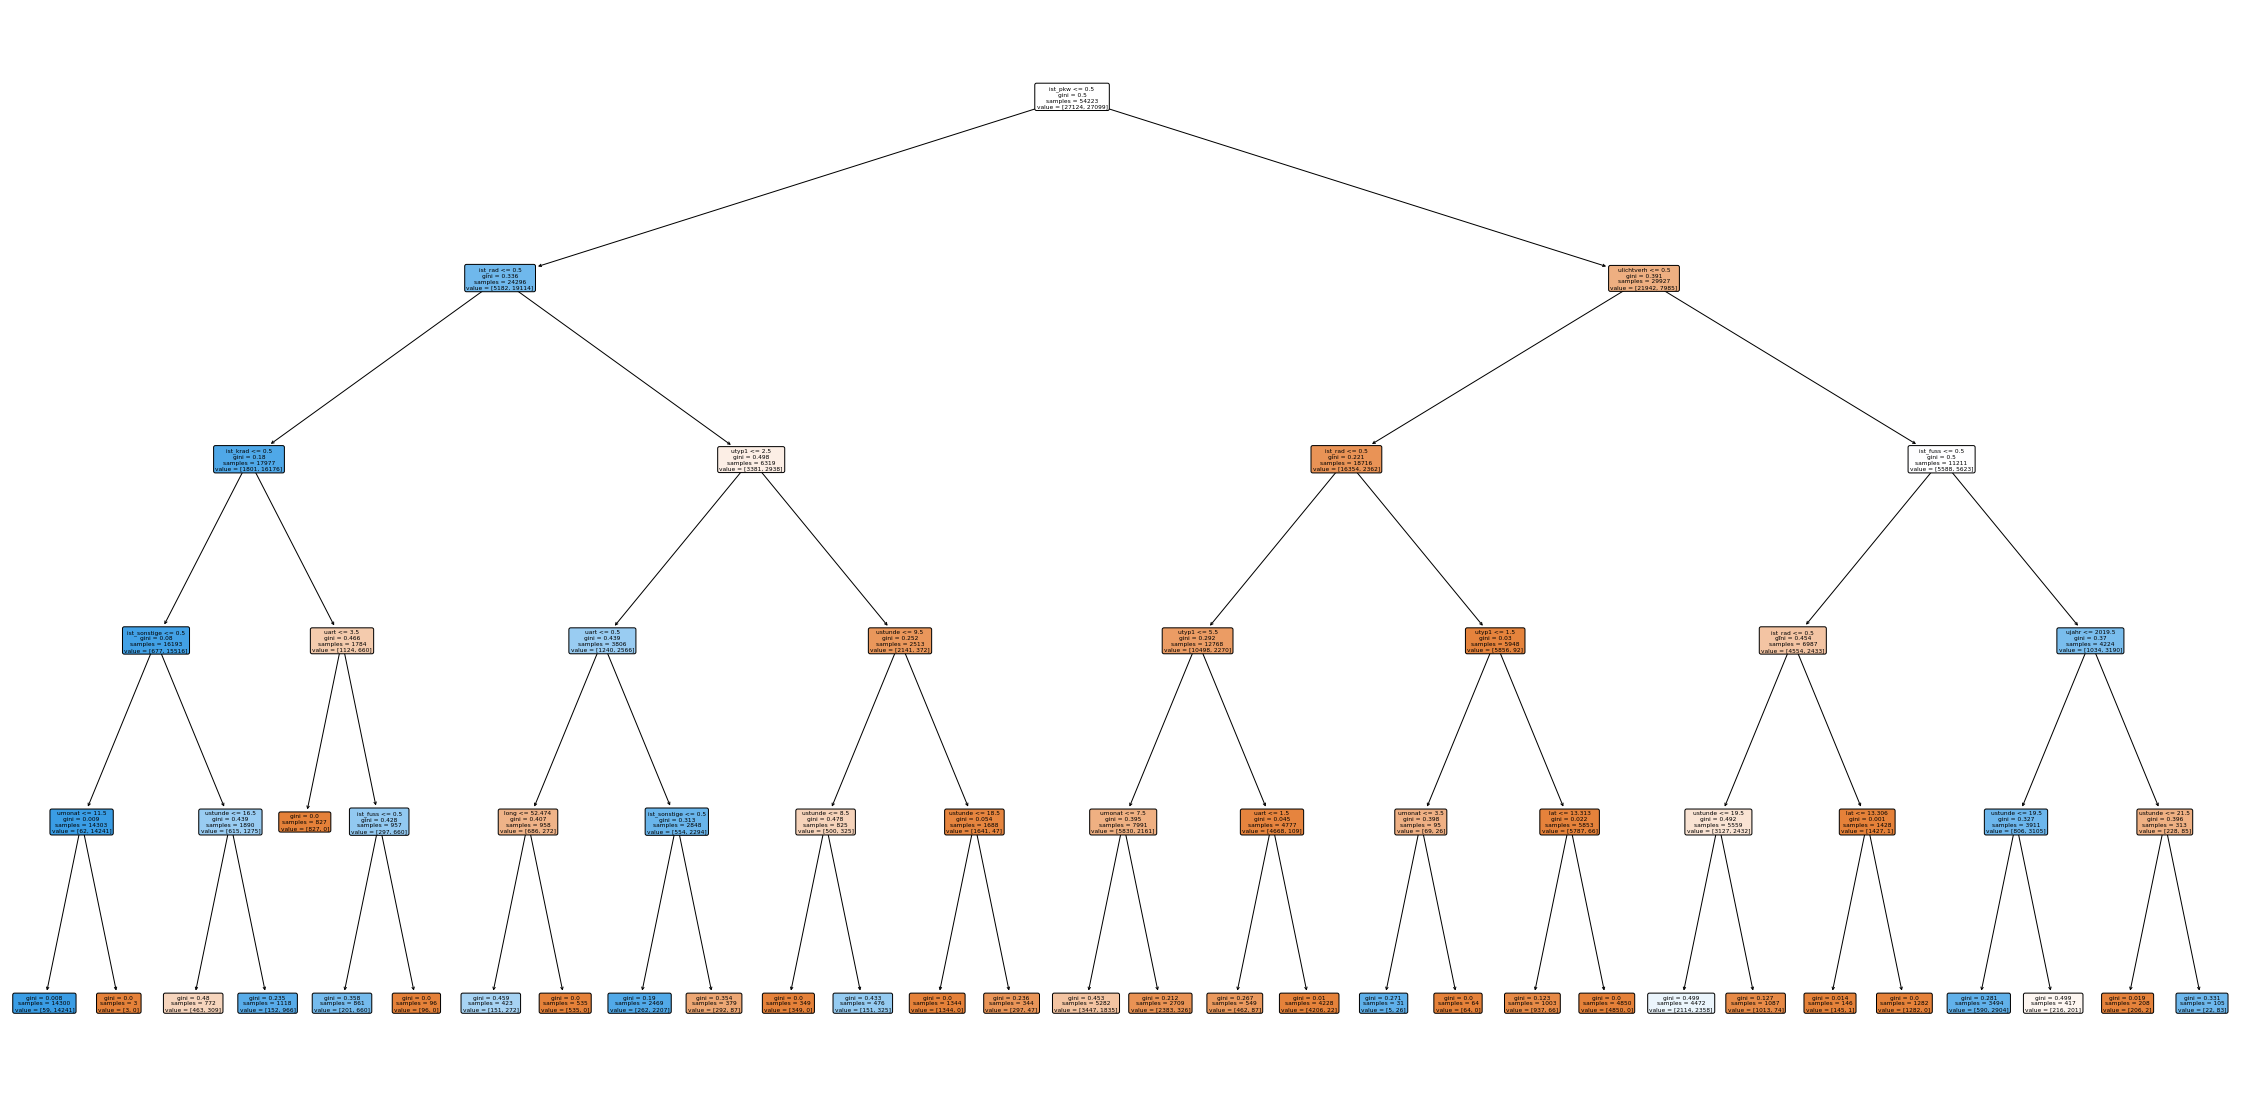

In [12]:
compare_performance_df = pd.DataFrame()

for depth in range(5,6):
    dt = DecisionTreeClassifier(max_depth=depth)

    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)

    performance_df = pd.DataFrame({"depth" : depth,
                                   'error_metric': ['Accuracy','Precision','Recall'],
                                   'train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt, pos_label=1),
                                             recall_score(y_train, y_pred_train_dt, pos_label=1)],
                                   'test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt, pos_label=1),
                                            recall_score(y_test, y_pred_test_dt, pos_label=1)]})
    
    compare_performance_df = pd.concat([compare_performance_df,performance_df], axis=0)

print("Tree plot")
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,20)) # ,dpi=200)

plot_tree(dt,filled = True, rounded=True, feature_names = X.columns)
plt.show() 

In [13]:
compare_performance_df

,depth,error_metric,train,test
0,5,Accuracy,0.875256,0.874995
1,5,Precision,0.866410,0.865116
2,5,Recall,0.887191,0.888841


,Error_metric,Train,Test
0,Accuracy,0.831511,0.835621
1,Precision,0.839219,0.842211
2,Recall,0.819956,0.826427


Confusion matrix for the train set
[[22867  4257]
 [ 4879 22220]]


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


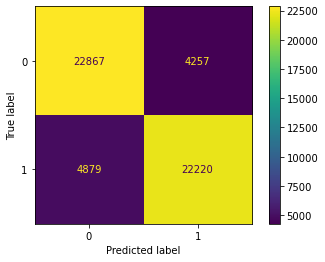



Confusion matrix for the test set
[[9806 1801]
 [2019 9613]]


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


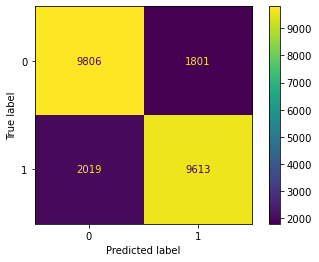

In [14]:
log_model = LogisticRegression() 


trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [15]:
feat_imp_df = pd.DataFrame(zip(X_train.columns, np.transpose(log_model.coef_.tolist()[0])), columns=['features', 'coef'])

feat_imp_df["coef_abs"] = list(map(lambda x: abs(x), feat_imp_df.coef))
feat_imp_df.sort_values("coef_abs", ascending=False)

,features,coef,coef_abs
11,ist_pkw,-1.937571,1.937571
10,ist_rad,-1.451238,1.451238
15,ist_sonstige,-0.814722,0.814722
13,ist_krad,-0.691269,0.691269
6,ulichtverh,0.669425,0.669425
7,ustrzustand,-0.600371,0.600371
8,uart,0.537342,0.537342
9,utyp1,-0.315224,0.315224
2,uwochentag,-0.215690,0.215690
14,ist_gkfz,0.124871,0.124871


## Different approach to avoid overextensive upscaling

Group the injuries into not_severe and severe (= outcome is seriuosly injured or death)

In [16]:
data_["not_severe"] = list(map(lambda x: 1 if x == "slightly_injured" else 0, data_.accident_outcome))

In [17]:
data_.not_severe.value_counts()

1    32831
0     6020
Name: not_severe, dtype: int64

In [18]:
X = data_.drop(columns=['ujahr', 'long', 'lat', 'time_of_day', 'light_condition', 'weekday', 'street_condition', 
                        "accident_outcome", "ukategorie", "not_severe", "death"], axis = 1)
y = data_["not_severe"]


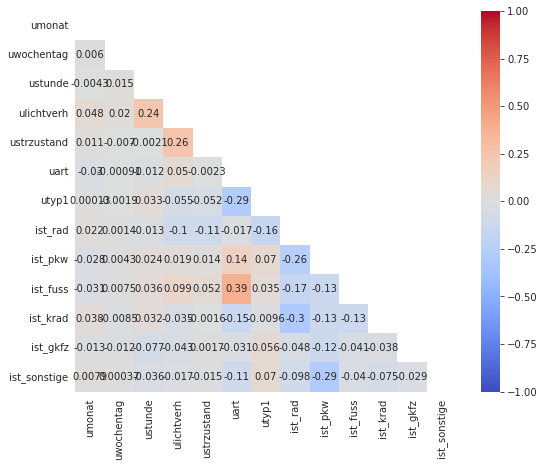

In [19]:
heat_map(X)

### Upsampling using smote

In [20]:
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    32831
0    32831
Name: not_severe, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=42)

#### Decision Tree

In [22]:
compare_performance_df = pd.DataFrame()

for depth in range(2,9):
    dt = DecisionTreeClassifier(max_depth=depth)

    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)

    performance_df = pd.DataFrame({"depth" : depth,
                                   'error_metric': ['Accuracy','Precision','Recall'],
                                   'train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt, pos_label=1),
                                             recall_score(y_train, y_pred_train_dt, pos_label=1)],
                                   'test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt, pos_label=1),
                                            recall_score(y_test, y_pred_test_dt, pos_label=1)]})
    
    compare_performance_df = pd.concat([compare_performance_df,performance_df], axis=0)


In [23]:
compare_performance_df.sort_values(["error_metric", "test"])

,depth,error_metric,train,test
0,2,Accuracy,0.607532,0.603229
0,3,Accuracy,0.624285,0.617696
0,4,Accuracy,0.651589,0.646733
0,5,Accuracy,0.663120,0.660084
0,6,Accuracy,0.674804,0.668765
0,7,Accuracy,0.690142,0.680187
0,8,Accuracy,0.701129,0.688106
1,2,Precision,0.583495,0.577278
1,3,Precision,0.589778,0.582247
1,4,Precision,0.646965,0.640329


Tree plot


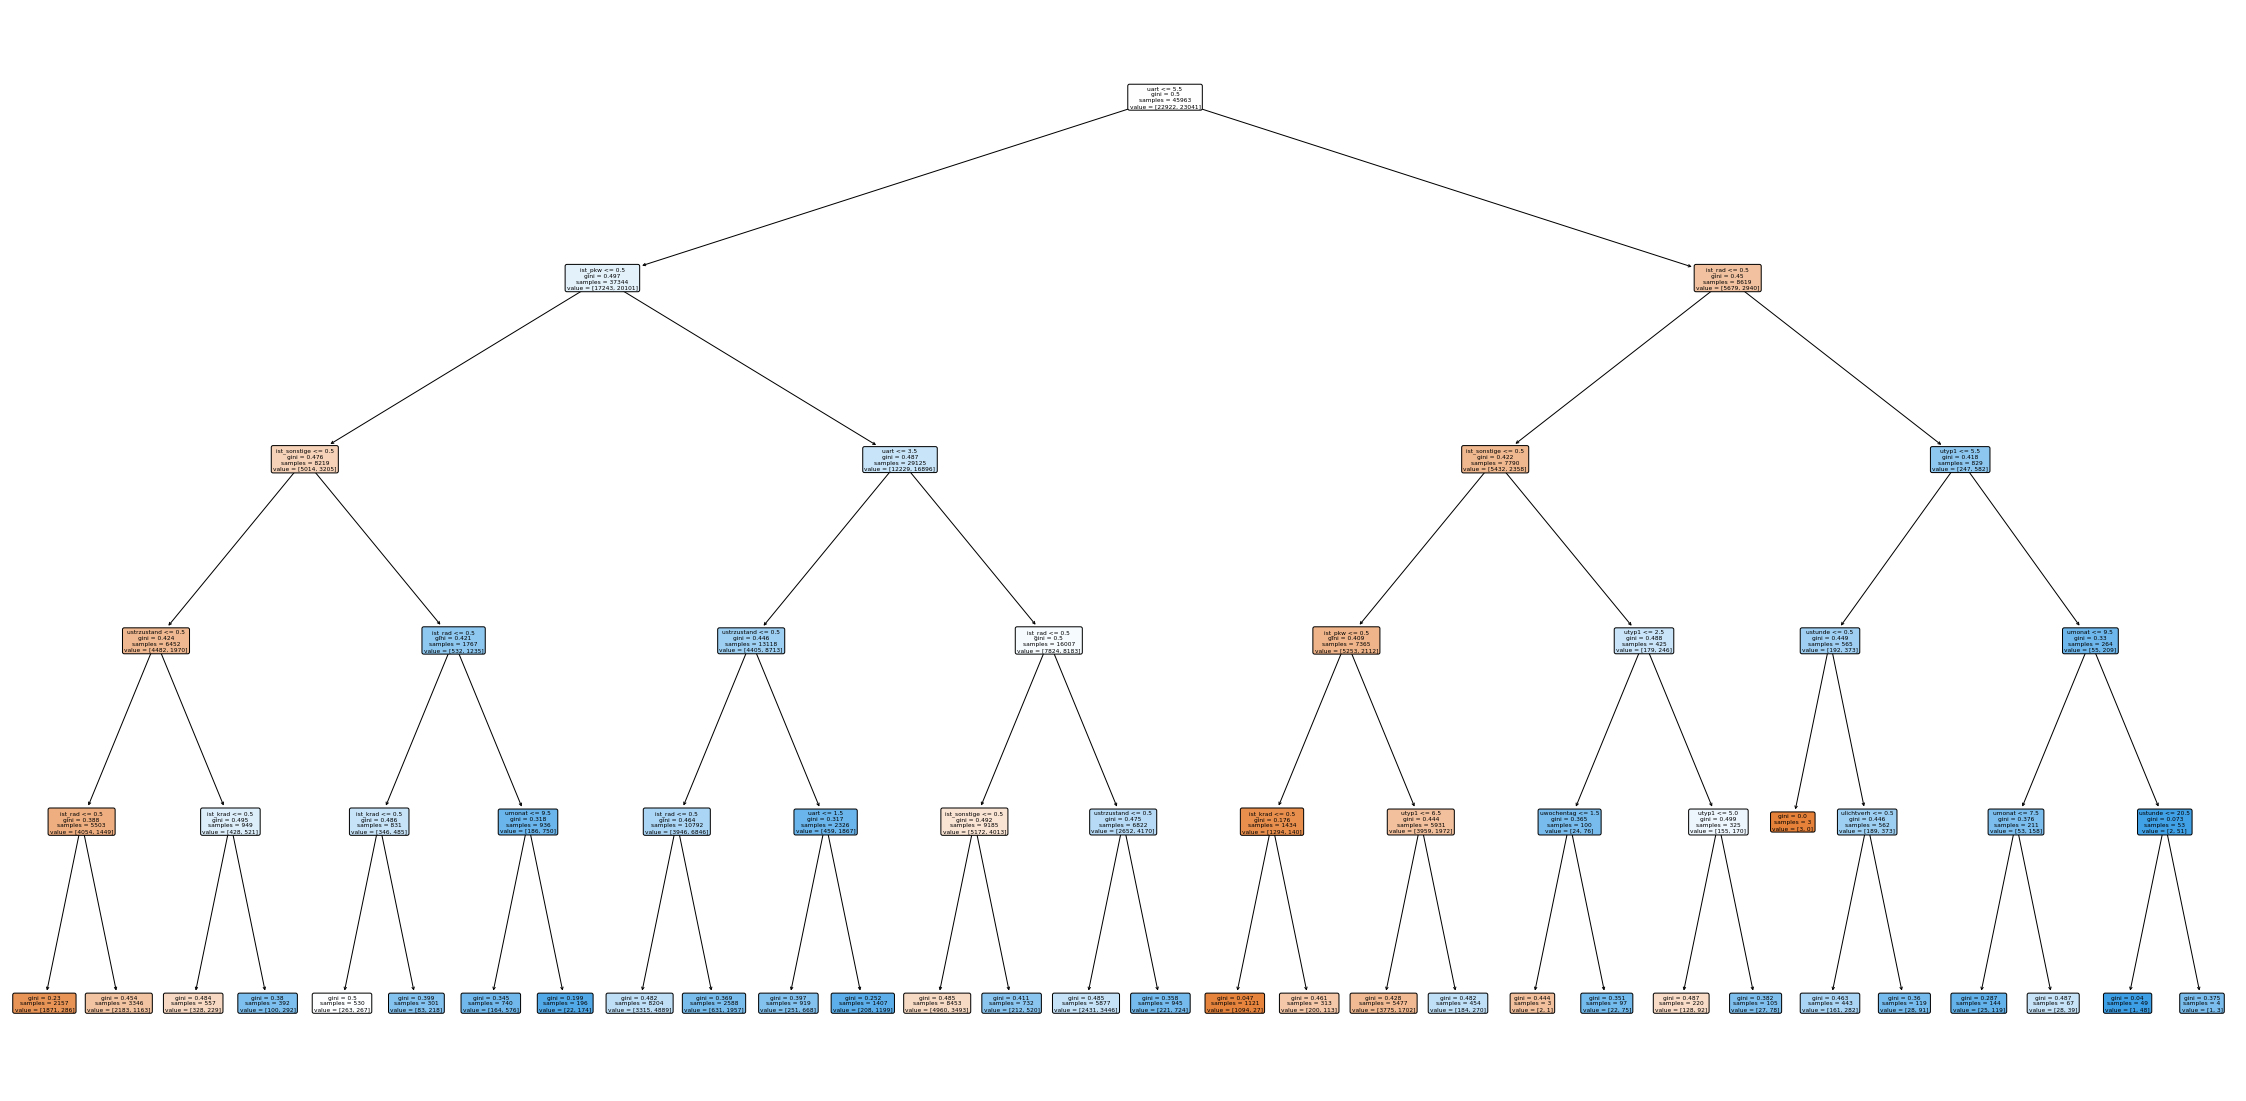

In [24]:
# depth of 5 seems to be a good average
dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

performance_df = pd.DataFrame({"depth" : depth,
                               'error_metric': ['Accuracy','Precision','Recall'],
                               'train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label=1),
                                         recall_score(y_train, y_pred_train_dt, pos_label=1)],
                               'test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label=1),
                                        recall_score(y_test, y_pred_test_dt, pos_label=1)]})

compare_performance_df = pd.concat([compare_performance_df,performance_df], axis=0)
print("Tree plot")
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,20)) # ,dpi=200)

plot_tree(dt,filled = True, rounded=True, feature_names = X.columns)
plt.show() 

#### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.649609,0.645972
1,Precision,0.654601,0.646758
2,Recall,0.637299,0.633810


Confusion matrix for the train set
[[15174  7748]
 [ 8357 14684]]


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


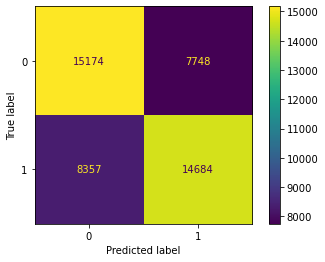



Confusion matrix for the test set
[[6520 3389]
 [3585 6205]]


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


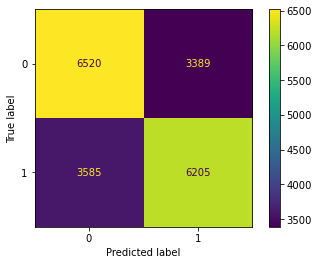

In [25]:
log_model = LogisticRegression() 


trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [26]:
feat_imp_df = pd.DataFrame(zip(X_train.columns, np.transpose(log_model.coef_.tolist()[0])), columns=['features', 'coef'])

feat_imp_df["coef_abs"] = list(map(lambda x: abs(x), feat_imp_df.coef))
feat_imp_df.sort_values("coef_abs", ascending=False)

,features,coef,coef_abs
8,ist_pkw,0.568339,0.568339
7,ist_rad,0.554377,0.554377
12,ist_sonstige,0.470143,0.470143
4,ustrzustand,0.321126,0.321126
10,ist_krad,0.224200,0.224200
6,utyp1,0.208607,0.208607
5,uart,-0.187915,0.187915
11,ist_gkfz,0.169910,0.169910
0,umonat,0.107650,0.107650
1,uwochentag,0.091228,0.091228


#### KNN

In [27]:
neighbors = 3
knn = KNeighborsClassifier(n_neighbors=neighbors)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.7658256764302757


In [28]:
compare_performance_df = pd.DataFrame()

for neighb in range(2,7):
    knn = KNeighborsClassifier(n_neighbors=neighb)

    knn.fit(X_train, y_train)
    
    y_pred_train_knn = knn.predict(X_train)
    y_pred_test_knn = knn.predict(X_test)

    performance_df = pd.DataFrame({"neighbors" : neighb,
                                   'error_metric': ['Accuracy','Precision','Recall'],
                                   'train': [accuracy_score(y_train, y_pred_train_knn),
                                             precision_score(y_train, y_pred_train_knn, pos_label=1),
                                             recall_score(y_train, y_pred_train_knn, pos_label=1)],
                                   'test': [accuracy_score(y_test, y_pred_test_knn),
                                            precision_score(y_test, y_pred_test_knn, pos_label=1),
                                            recall_score(y_test, y_pred_test_knn, pos_label=1)]})
    
    compare_performance_df = pd.concat([compare_performance_df,performance_df], axis=0)


compare_performance_df.sort_values(["error_metric", "test"])

,neighbors,error_metric,train,test
0,2,Accuracy,0.835650,0.733286
0,6,Accuracy,0.799926,0.736484
0,4,Accuracy,0.815221,0.739124
0,5,Accuracy,0.838000,0.757906
0,3,Accuracy,0.868873,0.765826
1,5,Precision,0.914122,0.835404
1,3,Precision,0.926459,0.835602
1,6,Precision,0.938939,0.871186
1,4,Precision,0.958580,0.888945
1,2,Precision,0.983214,0.908796


In [29]:
neighb = 3
knn = KNeighborsClassifier(n_neighbors=neighb)

knn.fit(X_train, y_train)

y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

performance_df = pd.DataFrame({"neighbors" : neighb,
                               'error_metric': ['Accuracy','Precision','Recall'],
                               'train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn, pos_label=1),
                                         recall_score(y_train, y_pred_train_knn, pos_label=1)],
                               'test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn, pos_label=1),
                                        recall_score(y_test, y_pred_test_knn, pos_label=1)]})

performance_df

,neighbors,error_metric,train,test
0,3,Accuracy,0.868873,0.765826
1,3,Precision,0.926459,0.835602
2,3,Recall,0.802092,0.658325


#### Random Forest

In [30]:
rfc_df = random_forest_classifier_df(X_train, y_train, this_max_dpth=5, this_max_cv=25, this_random_state=42)
rfc_df.sort_values("mean_score", ascending=False)

Depth: 2 -> 5, 10, 15, 20, 25,  ... done.
Depth: 3 -> 5, 10, 15, 20, 25,  ... done.
Depth: 4 -> 5, 10, 15, 20, 25,  ... done.
Depth: 5 -> 5, 10, 15, 20, 25,  ... done.


,max_depth,cv,mean_score
0,5,25,0.677350
0,5,20,0.676893
0,5,10,0.675457
0,5,15,0.675413
0,5,5,0.674195
0,4,20,0.669365
0,4,25,0.668690
0,4,15,0.668647
0,4,10,0.668451
0,4,5,0.667298


### Downsampling

In [31]:
cat_not = data_[data_.not_severe == 1]
cat_sev  = data_[data_.not_severe == 0]
print(f"""Not severe: {len(cat_not)} ({round(len(cat_not)*100/len(data_), 2)} %)
Severe    : {len(cat_sev):5d} ({round(len(cat_sev)*100/len(data_), 2)} %)""")


Not severe: 32831 (84.5 %)
Severe    :  6020 (15.5 %)


In [32]:
cat_not_down = cat_not.sample(len(cat_sev))
len(cat_not_down) == len(cat_sev)

True

In [33]:
data_down = pd.concat([cat_sev, cat_not_down], axis=0)
data_down = data_down.sample(frac=1)
len(data_down) == len(cat_sev) * 2

True

In [34]:
X = data_down.drop(columns=['ujahr', 'long', 'lat', 'time_of_day', 'light_condition', 'weekday', 'street_condition', 
                        "accident_outcome", "ukategorie", "not_severe", "death"], axis = 1)
y = data_down["not_severe"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Decision Tree

In [36]:
compare_performance_df = pd.DataFrame()

for depth in range(2,9):
    dt = DecisionTreeClassifier(max_depth=depth)

    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)

    performance_df = pd.DataFrame({"depth" : depth,
                                   'error_metric': ['Accuracy','Precision','Recall'],
                                   'train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt, pos_label=1),
                                             recall_score(y_train, y_pred_train_dt, pos_label=1)],
                                   'test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt, pos_label=1),
                                            recall_score(y_test, y_pred_test_dt, pos_label=1)]})
    
    compare_performance_df = pd.concat([compare_performance_df,performance_df], axis=0)

In [37]:
compare_performance_df.sort_values(["error_metric", "test"], ascending = (True, True))

,depth,error_metric,train,test
0,2,Accuracy,0.595159,0.587763
0,3,Accuracy,0.614618,0.596346
0,8,Accuracy,0.656977,0.600498
0,5,Accuracy,0.624941,0.602713
0,6,Accuracy,0.633365,0.604374
0,4,Accuracy,0.622686,0.606866
0,7,Accuracy,0.643094,0.618494
1,2,Precision,0.572377,0.564303
1,3,Precision,0.593240,0.576734
1,5,Precision,0.603361,0.582063


   depth error_metric     train      test
0      3     Accuracy  0.614618  0.596346
1      3    Precision  0.593240  0.576734
2      3       Recall  0.732164  0.715713 

---------------------------------------------------------------------------
Tree plot


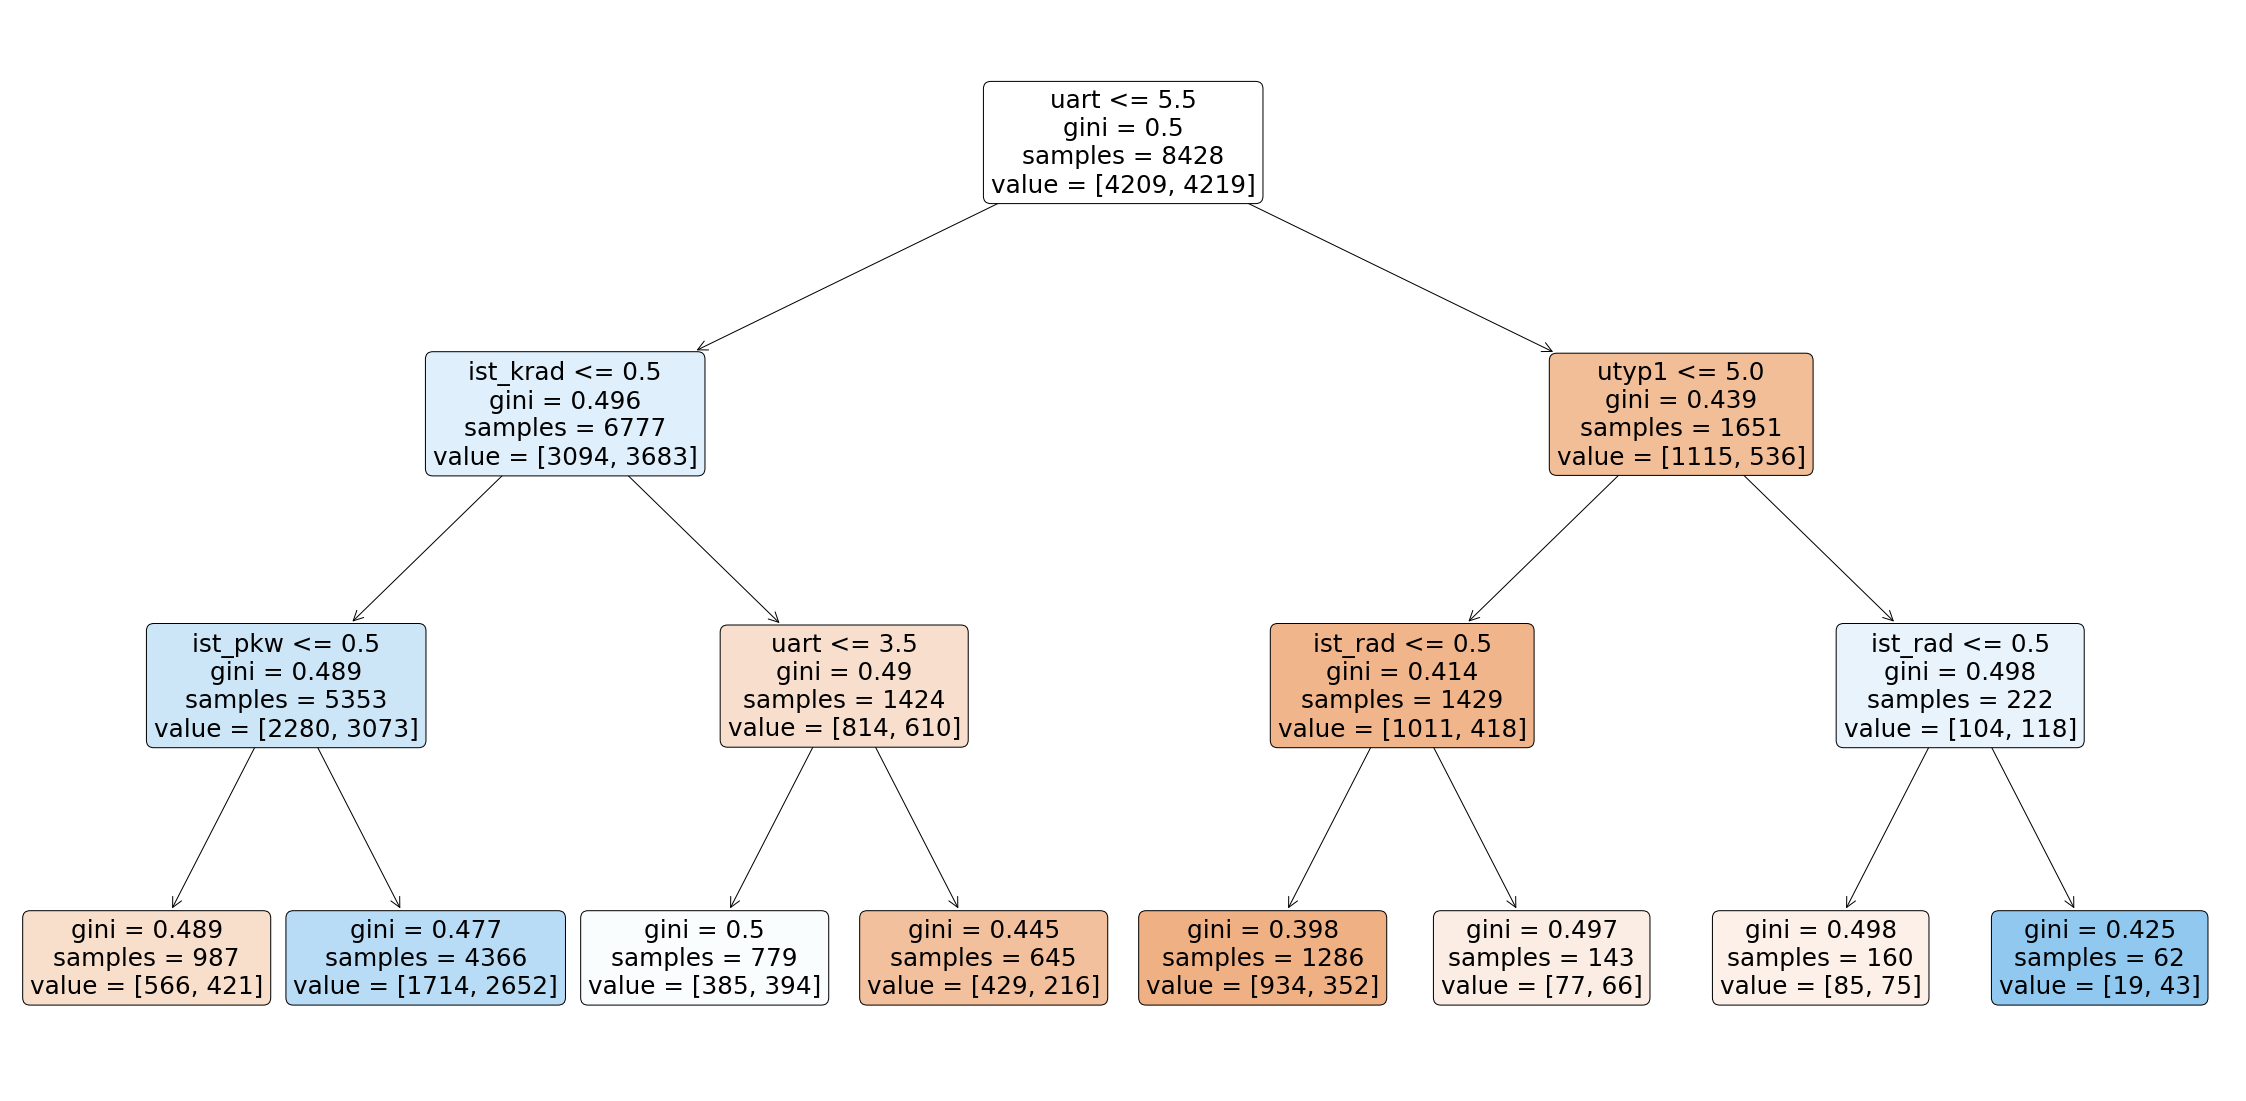

In [38]:
# depth of 7 seems to be a good average
depth = 3
dt = DecisionTreeClassifier(max_depth=depth)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

performance_df = pd.DataFrame({"depth" : depth,
                               'error_metric': ['Accuracy','Precision','Recall'],
                               'train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label=1),
                                         recall_score(y_train, y_pred_train_dt, pos_label=1)],
                               'test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label=1),
                                        recall_score(y_test, y_pred_test_dt, pos_label=1)]})

# compare_performance_df = pd.concat([compare_performance_df,performance_df], axis=0)
print(performance_df, "\n\n---------------------------------------------------------------------------")
print("Tree plot")
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,20)) # ,dpi=200)

plot_tree(dt,filled = True, rounded=True, feature_names = X.columns)
plt.show()


#### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.603583,0.590255
1,Precision,0.591344,0.577052
2,Recall,0.673619,0.667407


Confusion matrix for the train set
[[2245 1964]
 [1377 2842]]


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


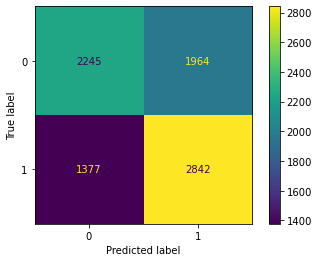



Confusion matrix for the test set
[[ 930  881]
 [ 599 1202]]


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


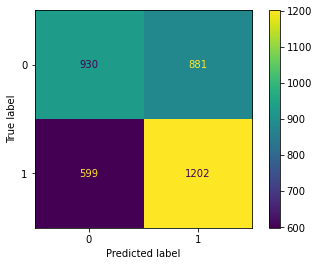

In [39]:
log_model = LogisticRegression() 


trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [40]:
# print(log_model.coef_, log_model.intercept_)

In [41]:
feat_imp_df = pd.DataFrame(zip(X_train.columns, np.transpose(log_model.coef_.tolist()[0])), columns=['features', 'coef'])

In [42]:
feat_imp_df["coef_abs"] = list(map(lambda x: abs(x), feat_imp_df.coef))
feat_imp_df.sort_values("coef_abs", ascending=False)

,features,coef,coef_abs
9,ist_fuss,-0.276575,0.276575
10,ist_krad,-0.220371,0.220371
6,utyp1,0.170276,0.170276
5,uart,-0.163886,0.163886
11,ist_gkfz,-0.126960,0.126960
3,ulichtverh,-0.125594,0.125594
8,ist_pkw,0.123223,0.123223
4,ustrzustand,0.064761,0.064761
0,umonat,0.039875,0.039875
1,uwochentag,-0.019160,0.019160


#### KNN

In [43]:
compare_performance_df = pd.DataFrame()

for neighb in range(2,7):
    knn = KNeighborsClassifier(n_neighbors=neighb)

    knn.fit(X_train, y_train)
    
    y_pred_train_knn = knn.predict(X_train)
    y_pred_test_knn = knn.predict(X_test)

    performance_df = pd.DataFrame({"neighbors" : neighb,
                                   'error_metric': ['Accuracy','Precision','Recall'],
                                   'train': [accuracy_score(y_train, y_pred_train_knn),
                                             precision_score(y_train, y_pred_train_knn, pos_label=1),
                                             recall_score(y_train, y_pred_train_knn, pos_label=1)],
                                   'test': [accuracy_score(y_test, y_pred_test_knn),
                                            precision_score(y_test, y_pred_test_knn, pos_label=1),
                                            recall_score(y_test, y_pred_test_knn, pos_label=1)]})
    
    compare_performance_df = pd.concat([compare_performance_df,performance_df], axis=0)


compare_performance_df.sort_values(["error_metric", "test"])

,neighbors,error_metric,train,test
0,2,Accuracy,0.783341,0.534053
0,5,Accuracy,0.711913,0.548173
0,6,Accuracy,0.684504,0.549280
0,4,Accuracy,0.721642,0.549557
0,3,Accuracy,0.774324,0.557032
1,5,Precision,0.702739,0.544828
1,3,Precision,0.764921,0.554236
1,2,Precision,0.995856,0.557957
1,6,Precision,0.733533,0.560028
1,4,Precision,0.811647,0.565710


In [44]:
neighb = 5
knn = KNeighborsClassifier(n_neighbors=neighb)

knn.fit(X_train, y_train)

y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

performance_df = pd.DataFrame({"neighbors" : neighb,
                               'error_metric': ['Accuracy','Precision','Recall'],
                               'train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn, pos_label=1),
                                         recall_score(y_train, y_pred_train_knn, pos_label=1)],
                               'test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn, pos_label=1),
                                        recall_score(y_test, y_pred_test_knn, pos_label=1)]})

performance_df

,neighbors,error_metric,train,test
0,5,Accuracy,0.711913,0.548173
1,5,Precision,0.702739,0.544828
2,5,Recall,0.735719,0.570239


#### Random Forest

In [45]:
rfc_df = random_forest_classifier_df(X_train, y_train, this_max_dpth=5, this_max_cv=25, this_random_state=42)
rfc_df.sort_values("mean_score", ascending=False)

Depth: 2 -> 5, 10, 15, 20, 25,  ... done.
Depth: 3 -> 5, 10, 15, 20, 25,  ... done.
Depth: 4 -> 5, 10, 15, 20, 25,  ... done.
Depth: 5 -> 5, 10, 15, 20, 25,  ... done.


,max_depth,cv,mean_score
0,5,20,0.623752
0,5,25,0.623631
0,5,10,0.622094
0,5,15,0.622093
0,5,5,0.621380
0,4,5,0.619127
0,4,15,0.618532
0,4,20,0.618530
0,4,25,0.617462
0,4,10,0.616755
